In [1]:
!pip install -q scikit-learn==1.4.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 73.7 MB/s eta 0:00:00:00:0100:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.
umap-learn 0.5.9.post2 requires scikit-learn>=1.6, but you have scikit-learn 1.4.2 which is incompatible.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTENC, SMOTE
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
import joblib
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("/kaggle/input/stunting-wasting-dataset/stunting_wasting_dataset.csv")
df.head()

,Jenis Kelamin,Umur (bulan),Tinggi Badan (cm),Berat Badan (kg),Stunting,Wasting
0,Laki-laki,19,91.6,13.3,Tall,Risk of Overweight
1,Laki-laki,20,77.7,8.5,Stunted,Underweight
2,Laki-laki,10,79.0,10.3,Normal,Risk of Overweight
3,Perempuan,2,50.3,8.3,Severely Stunted,Risk of Overweight
4,Perempuan,5,56.4,10.9,Severely Stunted,Risk of Overweight


In [4]:
df.tail()

,Jenis Kelamin,Umur (bulan),Tinggi Badan (cm),Berat Badan (kg),Stunting,Wasting
99995,Laki-laki,11,75.3,7.3,Normal,Underweight
99996,Laki-laki,21,93.7,14.8,Normal,Risk of Overweight
99997,Perempuan,18,82.9,12.6,Normal,Risk of Overweight
99998,Laki-laki,7,73.6,5.5,Normal,Severely Underweight
99999,Laki-laki,17,88.8,6.7,Normal,Severely Underweight


In [5]:
df.sample(5)

,Jenis Kelamin,Umur (bulan),Tinggi Badan (cm),Berat Badan (kg),Stunting,Wasting
66748,Laki-laki,0,49.9,6.0,Normal,Risk of Overweight
97592,Laki-laki,3,66.2,5.8,Normal,Normal weight
86038,Laki-laki,11,77.3,10.5,Normal,Normal weight
59129,Perempuan,3,61.4,6.2,Normal,Normal weight
76295,Perempuan,8,65.2,8.6,Normal,Normal weight


In [6]:
df.shape

(100000, 6)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Jenis Kelamin      100000 non-null  object 
 1   Umur (bulan)       100000 non-null  int64  
 2   Tinggi Badan (cm)  100000 non-null  float64
 3   Berat Badan (kg)   100000 non-null  float64
 4   Stunting           100000 non-null  object 
 5   Wasting            100000 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 4.6+ MB


In [8]:
df.describe()

,Umur (bulan),Tinggi Badan (cm),Berat Badan (kg)
count,100000.000000,100000.000000,100000.000000
mean,11.992580,73.132657,9.259256
std,7.199671,11.360846,3.300780
min,0.000000,42.600000,1.000000
25%,6.000000,65.500000,6.900000
50%,12.000000,74.200000,9.200000
75%,18.000000,81.400000,11.700000
max,24.000000,97.600000,17.200000


In [9]:
df.isnull().sum()

Jenis Kelamin        0
Umur (bulan)         0
Tinggi Badan (cm)    0
Berat Badan (kg)     0
Stunting             0
Wasting              0
dtype: int64

In [10]:
df.duplicated().sum()

7308

In [11]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [12]:
df = df.drop("Wasting", axis=1)
df.head()

,Jenis Kelamin,Umur (bulan),Tinggi Badan (cm),Berat Badan (kg),Stunting
0,Laki-laki,19,91.6,13.3,Tall
1,Laki-laki,20,77.7,8.5,Stunted
2,Laki-laki,10,79.0,10.3,Normal
3,Perempuan,2,50.3,8.3,Severely Stunted
4,Perempuan,5,56.4,10.9,Severely Stunted


In [13]:
encoding_dict = {}

for enc in ['Jenis Kelamin', 'Stunting']:
    encoding = LabelEncoder()
    df[enc] = encoding.fit_transform(df[enc])
    encoding_dict[enc] = encoding
df.head()

,Jenis Kelamin,Umur (bulan),Tinggi Badan (cm),Berat Badan (kg),Stunting
0,0,19,91.6,13.3,3
1,0,20,77.7,8.5,2
2,0,10,79.0,10.3,0
3,1,2,50.3,8.3,1
4,1,5,56.4,10.9,1


In [14]:
for name in ["Jenis Kelamin", "Stunting"]:
    print(f"Mapping label ke angka {name}:", dict(zip(encoding_dict[name].classes_, range(len(encoding_dict[name].classes_)))))

Mapping label ke angka Jenis Kelamin: {'Laki-laki': 0, 'Perempuan': 1}
Mapping label ke angka Stunting: {'Normal': 0, 'Severely Stunted': 1, 'Stunted': 2, 'Tall': 3}


# Checking Outlier

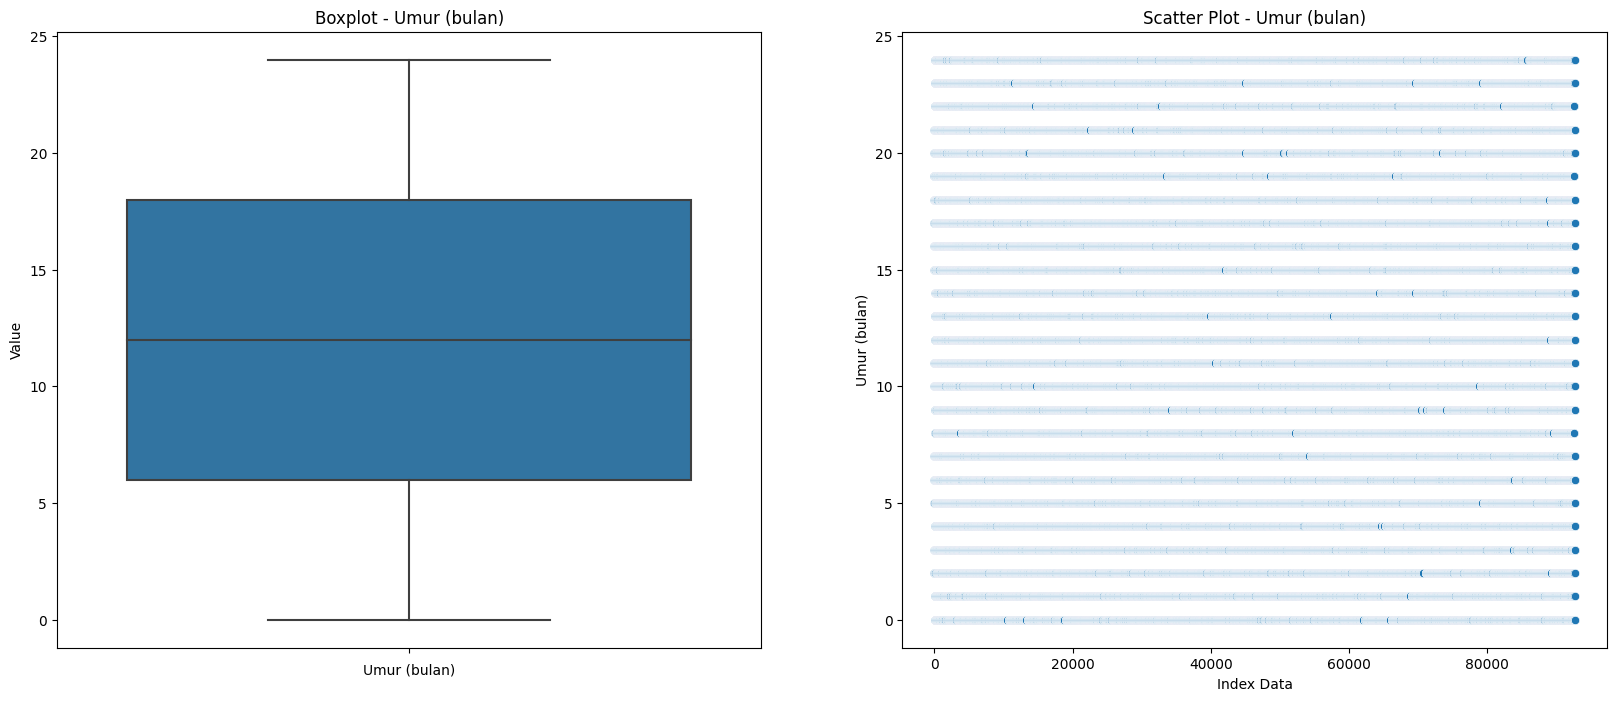

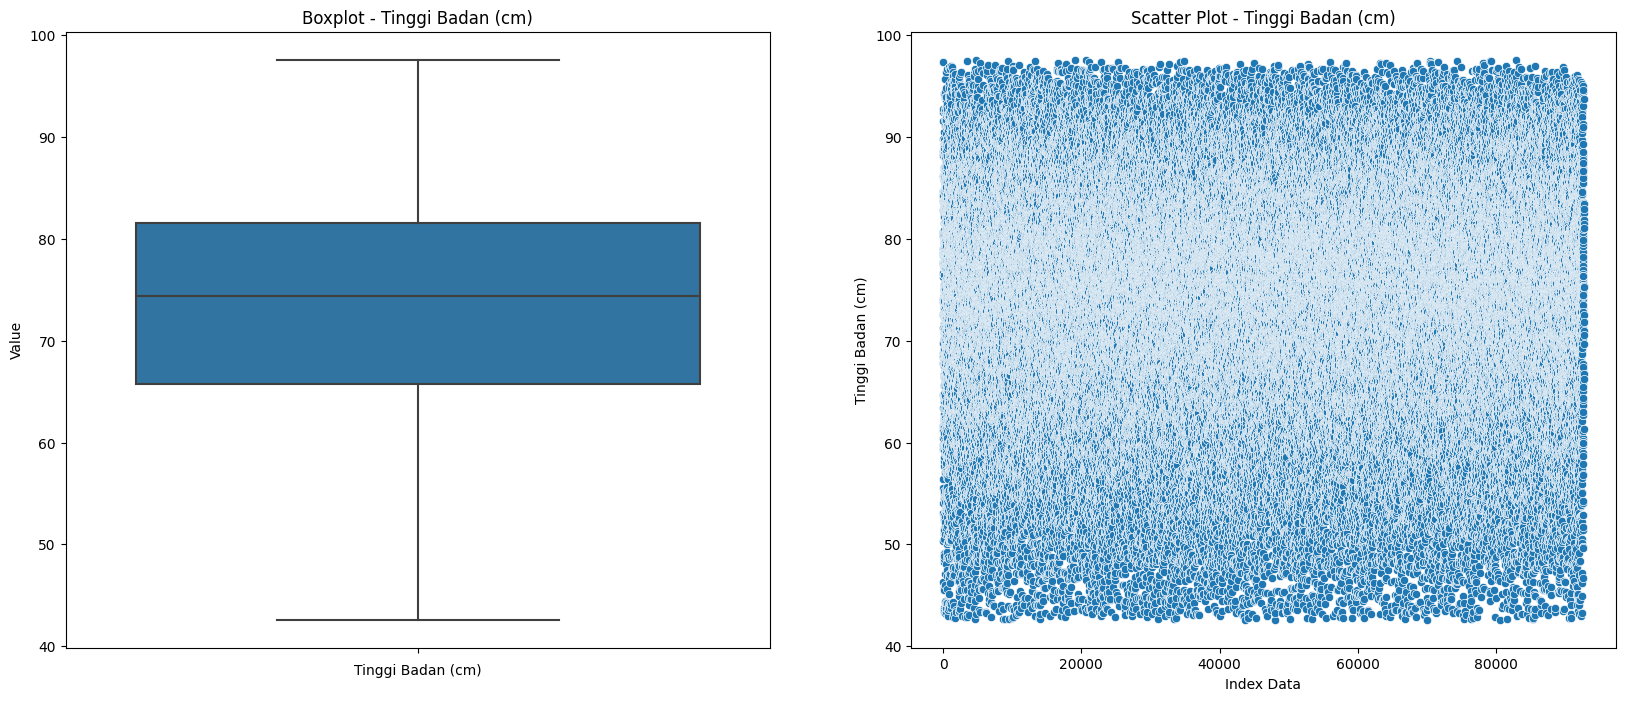

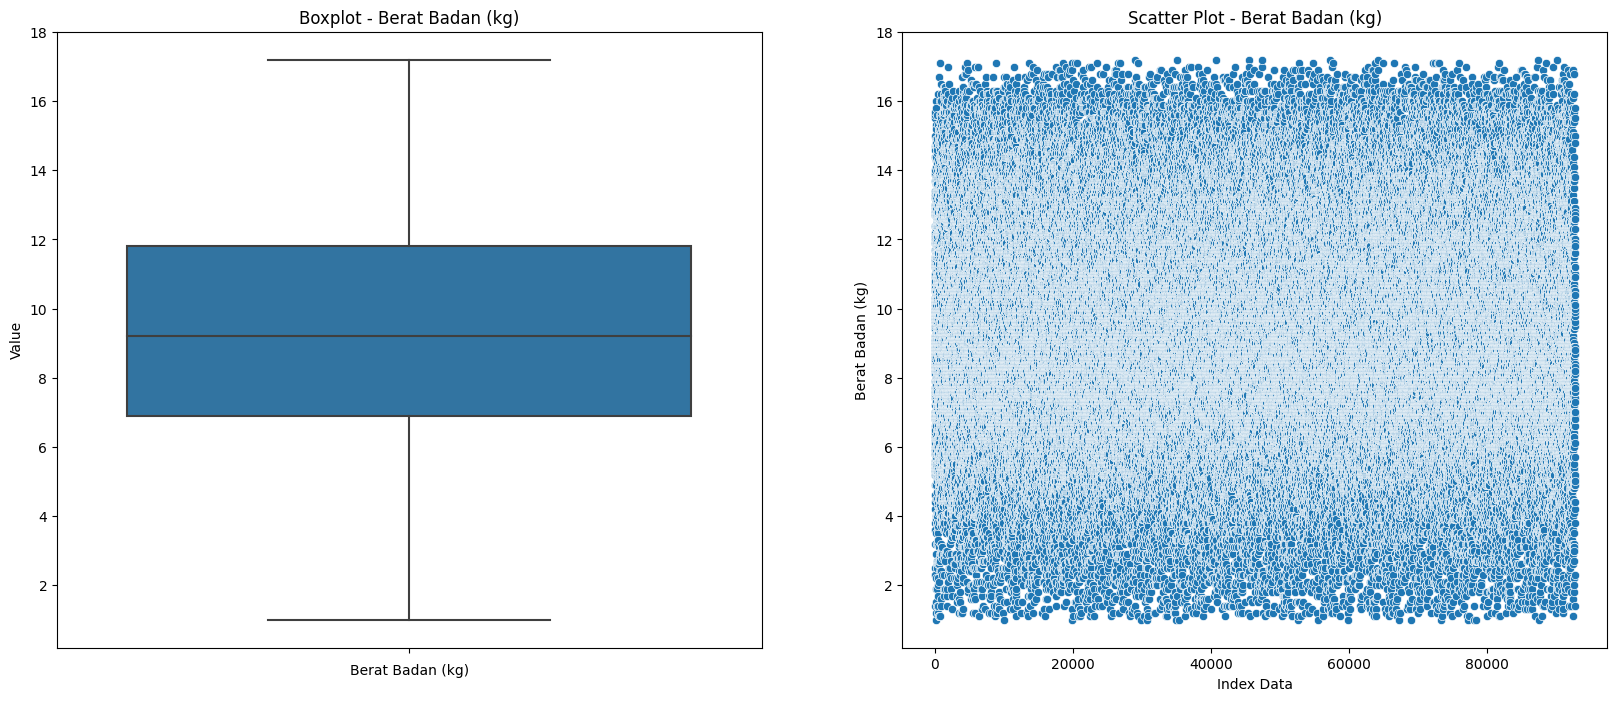

In [15]:
cols = df.drop(["Stunting", "Jenis Kelamin"], axis = 1).columns
for col in cols:
    plt.figure(figsize=(20, 8))
    
    plt.subplot(1, 2, 1)
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot - {col}", fontsize=12)
    plt.xlabel(col)
    plt.ylabel("Value")

    plt.subplot(1, 2, 2)
    sns.scatterplot(x = range(len(df)), y = df[col])
    plt.title(f"Scatter Plot - {col}", fontsize=12)
    plt.xlabel("Index Data")
    plt.ylabel(col)

    plt.show()

In [16]:
scaler = MinMaxScaler()
df[cols] = scaler.fit_transform(df[cols])
df.head()

,Jenis Kelamin,Umur (bulan),Tinggi Badan (cm),Berat Badan (kg),Stunting
0,0,0.791667,0.890909,0.759259,3
1,0,0.833333,0.638182,0.462963,2
2,0,0.416667,0.661818,0.574074,0
3,1,0.083333,0.140000,0.450617,1
4,1,0.208333,0.250909,0.611111,1


In [17]:
X = df.drop("Stunting", axis  = 1)
y = df["Stunting"]

In [18]:
rf = RandomForestClassifier(n_estimators = 100, random_state=42)
rf.fit(X, y)

feature_importances = pd.DataFrame({
    'features': X.columns, 
    'importances':rf.feature_importances_
})
feature_importances = feature_importances.sort_values(by='importances', ascending = False)
feature_importances

,features,importances
2,Tinggi Badan (cm),0.558273
1,Umur (bulan),0.337833
0,Jenis Kelamin,0.076937
3,Berat Badan (kg),0.026957


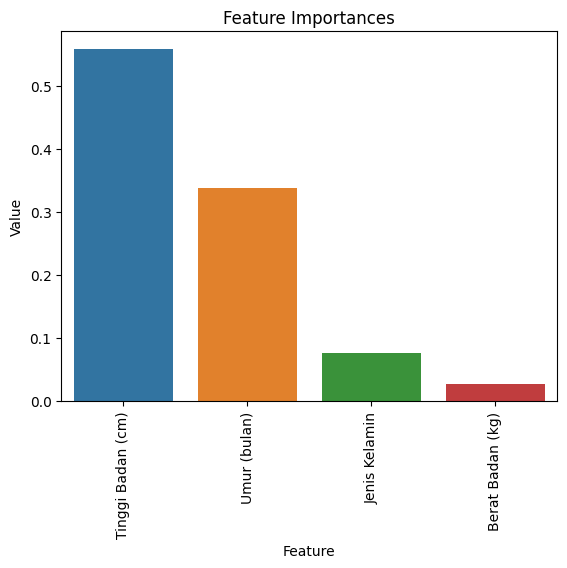

In [19]:
sns.barplot(x = "features", y = "importances", data = feature_importances)
plt.title("Feature Importances")
plt.xlabel("Feature")
plt.ylabel("Value")
plt.xticks(rotation = 90)
plt.show()

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Stunting
0    53644
2    12031
1     4266
3     4212
Name: count, dtype: int64


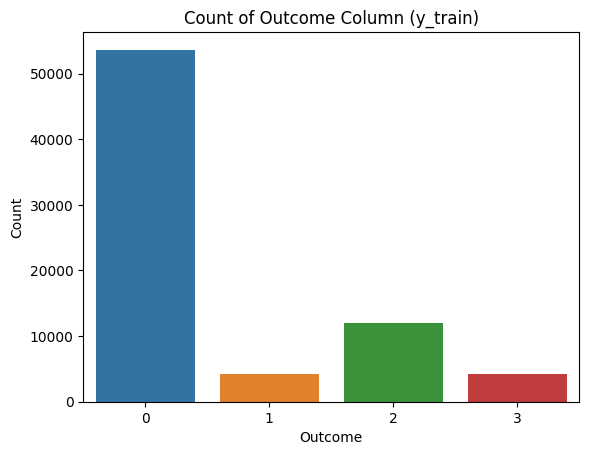

In [21]:
print(y_train.value_counts())

sns.countplot(x = y_train)
plt.title("Count of Outcome Column (y_train)")
plt.xlabel("Outcome")
plt.ylabel("Count")
plt.show()

In [22]:
index_kolom_kategorikal = [0]
sm = SMOTENC(categorical_features=index_kolom_kategorikal, random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

Stunting
0    53644
3    53644
2    53644
1    53644
Name: count, dtype: int64


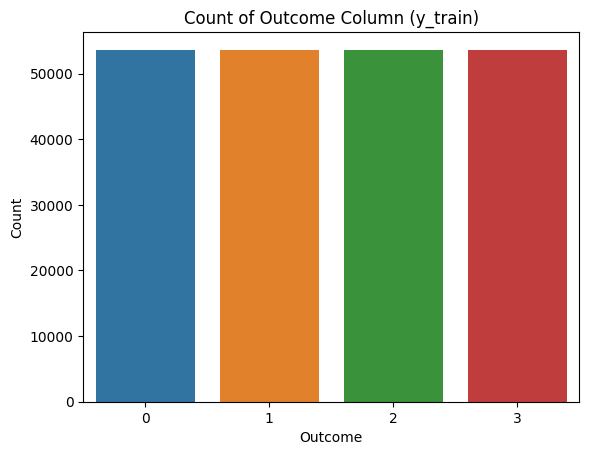

In [23]:
print(y_train_resampled.value_counts())

sns.countplot(x = y_train_resampled)
plt.title("Count of Outcome Column (y_train)")
plt.xlabel("Outcome")
plt.ylabel("Count")
plt.show()

In [24]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(),
    "Naive Bayes": GaussianNB(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier()
}

In [25]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

all_model_scores = {}

for name, model in models.items():
    scores = cross_val_score(model, X_train_resampled, y_train_resampled, cv=skf, scoring='accuracy')
    print(f"{name} - Accuracy: {np.mean(scores):.4f} (+/- {np.std(scores):.4f})")
    all_model_scores[name] = round(np.mean(scores), 4)

Logistic Regression - Accuracy: 0.7284 (+/- 0.0014)
Random Forest - Accuracy: 1.0000 (+/- 0.0000)
XGBoost - Accuracy: 0.9922 (+/- 0.0004)
Naive Bayes - Accuracy: 0.4395 (+/- 0.0024)
K-Nearest Neighbors - Accuracy: 0.9843 (+/- 0.0006)
Decision Tree - Accuracy: 1.0000 (+/- 0.0000)


In [26]:
models.pop("Logistic Regression")
models.pop("Naive Bayes")

GaussianNB()

 -  Name: Random Forest
 -  Accuracy: 99.99%
 -  Recall: 100%
 -  Precision: 100%


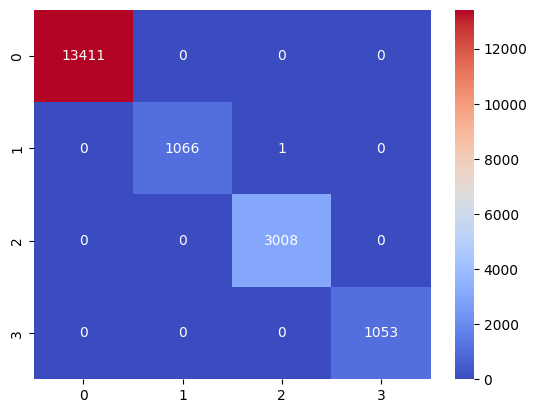

 -  Name: XGBoost
 -  Accuracy: 98.61%
 -  Recall: 98%
 -  Precision: 96%


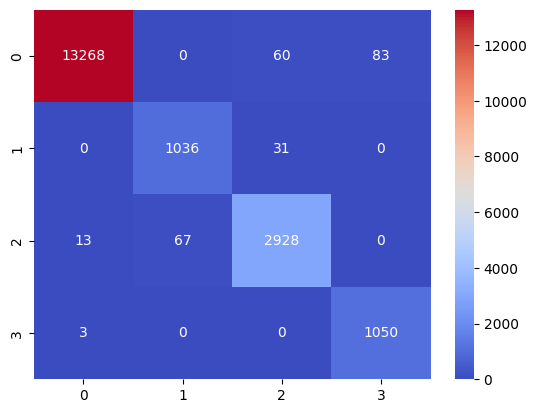

 -  Name: K-Nearest Neighbors
 -  Accuracy: 95.71%
 -  Recall: 96%
 -  Precision: 88%


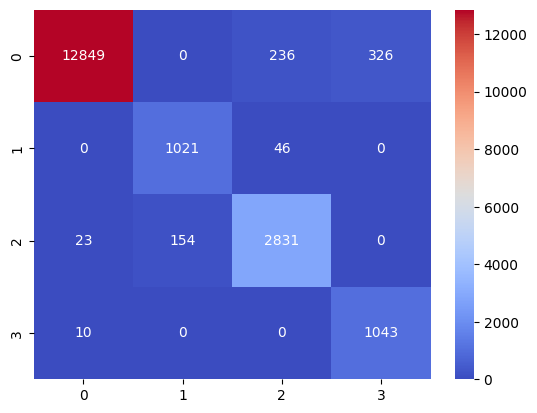

 -  Name: Decision Tree
 -  Accuracy: 100.0%
 -  Recall: 100%
 -  Precision: 100%


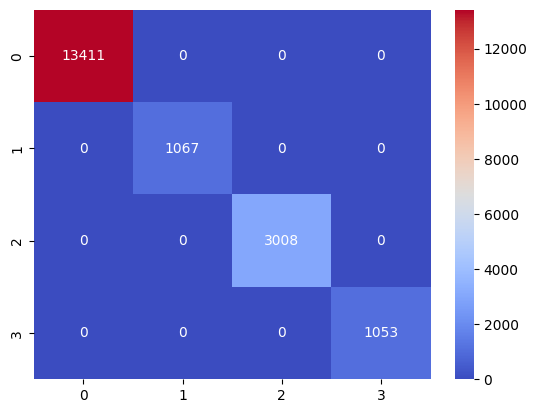

In [27]:
for name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)

    acc = round(accuracy_score(y_test, y_pred) * 100, 2)
    recall = round(recall_score(y_test, y_pred, average='macro') * 100)
    precision = round(precision_score(y_test, y_pred, average='macro') * 100)

    print(f" -  Name: {name}")
    print(f" -  Accuracy: {acc}%")
    print(f" -  Recall: {recall}%")
    print(f" -  Precision: {precision}%")

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot = True, fmt='g', cmap="coolwarm")
    plt.show()

 -  Name: Decision Tree
 -  Accuracy: 99.99%
 -  Recall: 100%
 -  Precision: 100%


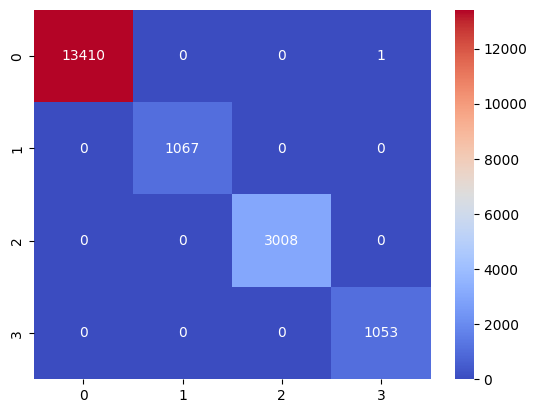

In [28]:
best_model = DecisionTreeClassifier()
best_model.fit(X_train_resampled, y_train_resampled)
y_pred = best_model.predict(X_test)

acc = round(accuracy_score(y_test, y_pred) * 100, 2)
recall = round(recall_score(y_test, y_pred, average='macro') * 100)
precision = round(precision_score(y_test, y_pred, average='macro') * 100)

print(f" -  Name: {name}")
print(f" -  Accuracy: {acc}%")
print(f" -  Recall: {recall}%")
print(f" -  Precision: {precision}%")

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt='g', cmap="coolwarm")
plt.show()

# Try it Yourself

In [29]:
## print("Enter patient data for diabetes prediction:\n")

name = str(input("Name: "))
gender = str(input("Gender (Laki-laki/ Perempuan): "))
age = int(input("Age (Bulan): "))
tinggi_badan = float(input("Tinggi Badan (cm): "))
berat_badan = float(input("Berat Badan (kg): "))

# Laki-laki 19	91.6	13.3

df = pd.DataFrame({
    "Jenis Kelamin": [gender],
    "Umur (bulan)": [age],
    "Tinggi Badan (cm)": [tinggi_badan],
    "Berat Badan (kg)": [berat_badan]
})
df

Name:  Niko
Gender (Laki-laki/ Perempuan):  Laki-laki
Age (Bulan):  19
Tinggi Badan (cm):  91.6
Berat Badan (kg):  13.3


,Jenis Kelamin,Umur (bulan),Tinggi Badan (cm),Berat Badan (kg)
0,Laki-laki,19,91.6,13.3


In [30]:
df["Jenis Kelamin"] = encoding_dict["Jenis Kelamin"].transform(df["Jenis Kelamin"])
df

,Jenis Kelamin,Umur (bulan),Tinggi Badan (cm),Berat Badan (kg)
0,0,19,91.6,13.3


In [31]:
cols = df.drop("Jenis Kelamin", axis = 1).columns
df[cols] = scaler.transform(df[cols])
df

,Jenis Kelamin,Umur (bulan),Tinggi Badan (cm),Berat Badan (kg)
0,0,0.791667,0.890909,0.759259


In [32]:
# Predict using the trained model
prediction = best_model.predict(df)
result = encoding_dict["Stunting"].inverse_transform(prediction)[0]

print("\n\n\n\nPrediction Result:")
print(f"Name: {name}")
print(f"Prediction: {result}")





Prediction Result:
Name: Niko
Prediction: Tall


# 💾 Save Model

In [33]:
# 🔹 Save the Encoder
for name in ["Jenis Kelamin", "Stunting"]:
    joblib.dump(encoding_dict[name], f"{name}_encoder.joblib")
    print(f"✅ Encoder for {name} saved successfully!")

# 🔹 Save the Scaler
joblib.dump(scaler, "scaler.joblib")
print("✅ Scaler saved successfully!")

# 🔹 Save the Trained Model
joblib.dump(best_model, "best_model.joblib")
print("✅ Model saved successfully! 🔥")

✅ Encoder for Jenis Kelamin saved successfully!
✅ Encoder for Stunting saved successfully!
✅ Scaler saved successfully!
✅ Model saved successfully! 🔥
